In [2]:
#Importing libraries
import pandas as pd             #Dataframe
import matplotlib.pyplot as plt #Visualization
import seaborn as sns           # Visualization
import numpy as np              #Numeric analysis
import statsmodels.api as sm    #Logistic regression
%matplotlib inline

In [3]:
data = pd.read_csv("bank.csv", delimiter=";")
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [4]:
#Splitting data into train and test data
data = data[['age','balance','duration','y']]
data.head(2)

,age,balance,duration,y
0,30,1787,79,no
1,33,4789,220,no


In [5]:
data["y1"] = np.where(data["y"].str.contains("yes"), 1, 0)
data = data.loc[:, data.columns!='y']
data.head()
data = data.rename(columns={'y1':'y'})
data.head(2)

,age,balance,duration,y
0,30,1787,79,0
1,33,4789,220,0


In [6]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Using the whole data set
train, test = train_test_split(data, test_size=0.2, random_state=42)
train.head(2)

<IPython.core.display.Javascript object>

,age,balance,duration,y
978,34,262,371,0
251,32,2349,134,0


In [7]:
# Import models and utility functions
import statsmodels.api as sm 


# get independent variables
X = train[['age','balance','duration']]


# get response variables
Y = train[['y']]


#model = sm.Logit(endog=Y, exog=X).fit()
model = sm.Logit(Y, X).fit(method='newton')

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.341714
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3616
Model:                          Logit   Df Residuals:                     3613
Method:                           MLE   Df Model:                            2
Date:                Sat, 12 Feb 2022   Pseudo R-squ.:                 0.05307
Time:                        21:40:38   Log-Likelihood:                -1235.6
converged:                       True   LL-Null:                       -1304.9
Covariance Type:            nonrobust   LLR p-value:                 8.430e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0714      0.002    -30.894      0.000      -0.076      -0.067
balance     1.389e-05   1.99e

In [8]:
# get odds ratio
np.exp(model.params)

age         0.931055
balance     1.000014
duration    1.002891
dtype: float64

In [12]:
# get the predicted values for the test dataset [0, 1]
pred = model.predict(exog=test[['age','balance','duration']])

# get confusion matrix and accuracy of the prediction
# note: there may be slightly different results if you use sklearn LogisticRegression method
from sklearn.metrics import accuracy_score, confusion_matrix
#confusion_matrix(y_true=list(test['y']), y_pred=list(round(pred)))
cm = confusion_matrix(y_true=list(test['y']), y_pred=list(round(pred)))
cm
# sns.heatmap(cm, annot=True,fmt="d",linewidths=.5, cmap="summer")
# plt.show()

array([[792,  15],
       [ 81,  17]], dtype=int64)

In the confusion matrix, diagonal numbers (807 and 0) indicate the correct predictions [true negatives (TN) and true positives (TP)] for the non-subscribed (0) and the subscribed (1) outcomes for test dataset. The other numbers (0 and 98) indicates incorrect predictions [false positives (FP) and false negatives (FN)]

In [11]:
# fitted model accuracy
accuracy_score(y_true=list(test['y']), y_pred=list(round(pred)))

0.8939226519337017

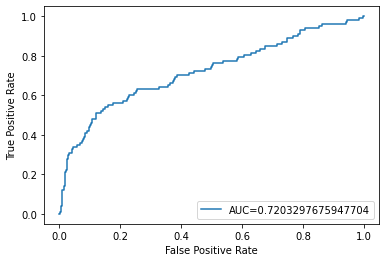

In [12]:
#create ROC curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr0, tpr0, thresholds = roc_curve(y_true=list(test['y']), y_score=list(pred))
auc0 = roc_auc_score(y_true=list(test['y']), y_score=list(pred))

plt.plot(fpr0,tpr0,label="AUC="+str(auc0))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In ROC, we can summarize the model predictability based on the area under curve (AUC). A model with higher AUC has higher predictability. AUC in this case refers to the probability that randomly chosen non-subscribed will have high chances of classification as non-subscribers than randomly chosen subscribed clients.

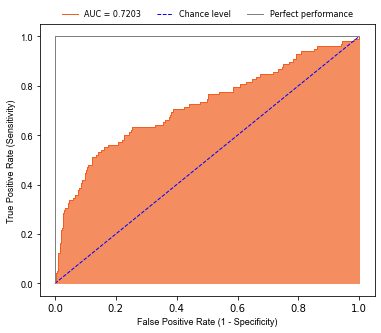

In [39]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import bioinfokit #this viz toolkit by Renesh Bedre can be found here: https://www.reneshbedre.com/blog/logistic-regression.html
from bioinfokit.visuz import stat

fpr0, tpr0, thresholds = roc_curve(y_true=list(test['y']), y_score=list(pred))
auc0 = roc_auc_score(y_true=list(test['y']), y_score=list(pred))

# plot ROC
bioinfokit.visuz.stat.roc(fpr=fpr0, tpr=tpr0, auc=auc0, 
                          shade_auc=True, per_class=True, 
                          legendpos='upper center', legendanchor=(0.5, 1.08),legendcols=3,
                          show = True)

### Using sklearn

In [51]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# get independent variables
X = train[['age','balance','duration']]


# get response variables
y = train[['y']]
y = np.ravel(y) #This was used because of a warning:  DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

model1 = LogisticRegression(solver='liblinear', random_state=0).fit(X,y)
#model1 = model1.fit(X, y)

In [99]:
# get the predicted values for the test dataset [0, 1]
pred1 = model1.predict(test[['age','balance','duration']])


In [100]:
# get confusion matrix and accuracy of the prediction
# note: there may be slightly different results if you use the statsmodel Logistic Regression method
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_true=list(test['y']), y_pred=list((pred1)))


array([[789,  18],
       [ 82,  16]], dtype=int64)

In [101]:
model1.score(X, y)

0.8891039823008849

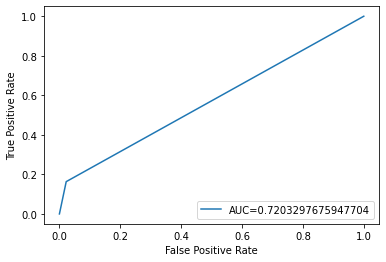

In [102]:
#create ROC curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr1, tpr1, thresholds = roc_curve(y_true=list(test['y']), y_score=list(pred1))
auc1 = roc_auc_score(y_true=list(test['y']), y_score=list(pred))

plt.plot(fpr1,tpr1,label="AUC="+str(auc1))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

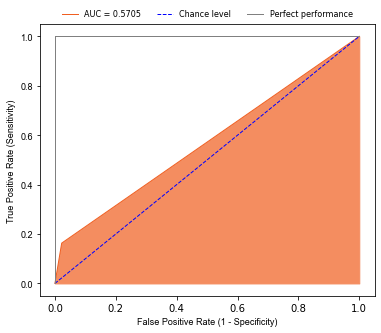

In [103]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import bioinfokit #this viz toolkit by Renesh Bedre can be found here: https://www.reneshbedre.com/blog/logistic-regression.html
from bioinfokit.visuz import stat

fpr1, tpr1, thresholds = roc_curve(y_true=list(test['y']), y_score=list(pred1))
#auc1 = roc_auc_score(y_true=list(test['y']), y_score=list(pred1))
auc1 = roc_auc_score(y_true=list(test['y']), y_score = pred1)

# plot ROC
bioinfokit.visuz.stat.roc(fpr=fpr1, tpr=tpr1, auc=auc1, 
                          shade_auc=True, per_class=True, 
                          legendpos='upper center', legendanchor=(0.5, 1.08),legendcols=3,
                          show = True)

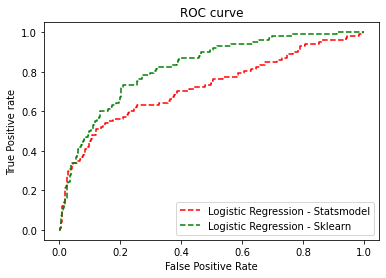

In [78]:
import matplotlib.pyplot as plt

# plot roc curves
plt.plot(fpr0, tpr0, linestyle='--',color='red', label='Logistic Regression - Statsmodel')
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='Logistic Regression - Sklearn')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
#plt.savefig('ROC',dpi=300)
plt.show();